In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display, clear_output
import time

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
def GridLine():
    ax = plt.gca();
    # Major ticks
    ax.set_xticks(np.arange(0, 10, 1));
    ax.set_yticks(np.arange(0, 10, 1));
    # Labels for major ticks
    ax.set_xticklabels(np.arange(1, 11, 1));
    ax.set_yticklabels(np.arange(1, 11, 1));
    # Minor ticks
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    return ax

In [4]:
class DijkstraDemo:
    def __init__(self,mmap,start,dest,draw=True):
        self.inputmap = mmap
        self.start = start
        self.dest = dest
        self.draw = draw
    def DijkstraGrid(self):
        # Initialization
        nrows,ncols = self.inputmap.shape
        statemap = np.zeros((nrows,ncols))
        statemap[self.inputmap==0] = 1
        statemap[self.inputmap==1] = 2
        statemap[self.start] = 5
        statemap[self.dest] = 6
        distanceArray = np.ones((nrows,ncols))*np.inf
        distanceArray[self.start[0],self.start[1]]=0
        parentArray = np.zeros((nrows,ncols))
        numExpanded = 0
        
        loc = np.array([[self.start[0],self.dest[0]],[self.start[1],self.dest[1]]])
        st_node = np.ravel_multi_index(loc,(nrows,ncols))
        
        fig = plt.figure()
        #ax = fig.add_subplot(1,1,1)
        ax = plt.gca()
        plt.ion()
        fig.show()
        fig.canvas.draw()
        
        while True:
            statemap[self.start] = 5
            statemap[self.dest] = 6
             
            if self.draw:
                ax.clear()
                ax.imshow(statemap)
                GridLine()
                fig.canvas.draw()
            
            min_dist = np.amin(distanceArray.flatten())
            current = np.argmin(distanceArray.flatten())
            #print(current)
            
            if (current==st_node[-1]) or np.isinf(min_dist):
                break
            
            current_ind = np.unravel_index(current,(10,10))
            statemap[current_ind] = 3
            distanceArray[current_ind] = np.inf
            numExpanded += 1
            
            i = current_ind[0]; j = current_ind[1]
            for jw in range(j-1,j+2,2):
                if i>=0 and i<=nrows-1 and jw>=0 and jw<=ncols-1:
                    if (statemap[i,jw]==1) or (statemap[i,jw]==6):
                        statemap[i,jw] = 4
                        distanceArray[i,jw] = min_dist+1
                        parentArray[i,jw] = current
            
            for iw in range(i-1,i+2,2):
                if iw>=0 and iw<=nrows-1 and j>=0 and j<=ncols-1:
                    if (statemap[iw,j]==1) or (statemap[iw,j]==6):
                        statemap[iw,j] = 4
                        distanceArray[iw,j] = min_dist+1
                        parentArray[iw,j] = current
        route = []
        route.append(self.dest)
        while parentArray[route[-1]] != 0:
            traceIdx = np.unravel_index(int(parentArray[route[-1]]),(10,10))
            route.append(traceIdx)


        for i in range(len(route)-2,0,-1):
            statemap[route[i]] = 7

            if self.draw:
                ax.clear()
                ax.imshow(statemap)
                GridLine()
                fig.canvas.draw()

     
        return statemap,route,parentArray,distanceArray

<IPython.core.display.Javascript object>


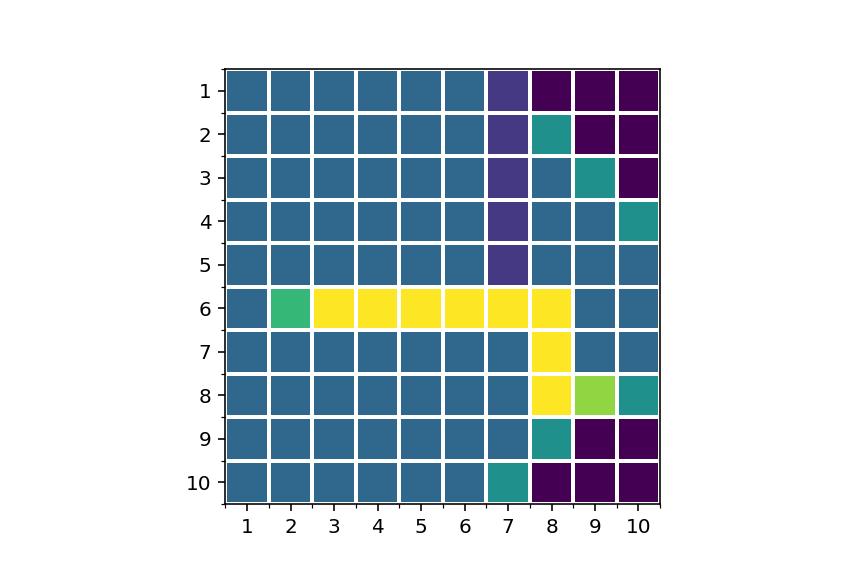

In [5]:
mmap = np.ones((10,10))*False
mmap[:5,6] = True
demo = DijkstraDemo(mmap,(5,1),(7,8))
statemap,route,parentArray,distanceArray = demo.DijkstraGrid()